<a href="https://colab.research.google.com/github/dpshepherd/PHY333_S2022/blob/main/Lab_1-1_with_uncertainity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using python to propogate uncertanties and fit linear plot with uncertainties


### Import numpy for calculations,  matplotlib for plotting, and scipy for data fitting

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import Model, RealData, ODR

### Data from lab 1-1 (generated by Katelyn)

#### Data for $R=20 k\Omega$ 

| Voltage [V] | Current [mA] |  
| ----------- | ------------ |
| 4.96 | 0.25 |
| 7.01 | 0.35 |
| 10.82 | 0.55 |
| 13.14 | 0.67 |
| 15.02 | 0.76 |  
  
#### Measurement uncertainity

[Fluke 87V multimeter manual](https://www.transcat.com/media/pdf/80vUserManual.pdf)

Relevant information starts on page 46 for DC voltage and page 48 for current. 

<u>Voltage</u>: For two significant figures in [V] use $\pm 0.05\% + 1$.

<u>Current</u>: For two significant figures in [mA] use $\pm 0.2\% + 4$.

In [103]:
# create arrays with voltage and current
voltage_values = np.asarray([4.96,7.01,10.82,13.14,15.02])
current_values = np.asarray([0.25,0.35,0.55,0.67,0.76])

# calculate uncertainity for voltage. Equation is [voltage] * .0005 + .0001
# we round each uncertainity to the number of measurement significant digits that Katelyn provided
voltage_uncertainities = np.round(voltage_values * .0005 + .0001,2)

# calculate uncertainity for current. Equation is [current] * .002 + .004
# we round each uncertainity to the number of measurement significant digits that Katelyn provided
current_uncertainities = np.round(current_values * .002 + .004,2)

## Plot measurements with uncertainities

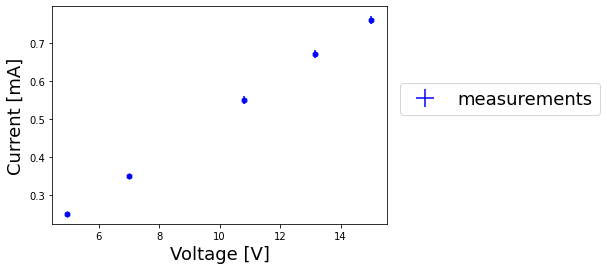

In [111]:
plt.errorbar(x=voltage_values,y=current_values,xerr=voltage_uncertainities,yerr=current_uncertainities,ls='none',label='measurements',color='b')
plt.scatter(voltage_values, current_values, s = 30, marker = "h", color = "b")
plt.xlabel('Voltage [V]', fontsize=18)
plt.ylabel('Current [mA]', fontsize=18)
plt.legend(loc=(1.04,.5),fontsize=18)
plt.show()

### Create function to fit  data and perform NLLS parameter optimization

In [85]:
# y = m*x + b 
# parameters[0] -> slope (1/R)
# parameters[1] -> offset

def function(parameters, voltage_values):

    model = parameters[0]*voltage_values + parameters[1]

    return model

### Create model and data structures for fitting

In [87]:
linear = Model(function)
experimental_data = RealData(voltage_values,current_values,sx=voltage_uncertainities,sy=current_uncertainities)

### Run fitting


In [88]:
linear_odr = ODR(experimental_data, linear, beta0=[1., 0.1])
ouptut_linear_odr = myodr.run()

### Extract results of the fitting

$m = \frac{1}{R}$

For the actual value, we can take the inverse. For the uncertainity, we need to be more careful.

$\frac{1}{m+\Delta m} = \frac{1}{m} - \frac{\Delta m}{m^2}$  
  
This gives $R = \frac{1}{m}$ and $\Delta R = \frac{\Delta m}{m^2}$

In [89]:
m = ouptut_linear_odr.beta[0]
dm = ouptut_linear_odr.sd_beta[0]
offset = ouptut_linear_odr.beta[1]
doffset = ouptut_linear_odr.sd_beta[1]

In [90]:
# Calculate R = 1/m
R=np.round((1/m),2)

# Caculate dR = dm / (m*m)
dR = np.round((dm/m**2),2)

# Output resistance
print('Resistance (k\u03A9) = ' + str(R) + ' +/- ' + str(dR))

Resistance (kΩ) = 19.56 +/- 0.16


### Plot result on top of data

We can create a linear array between the minimum and maximum values of the voltage that we calculated and then plot the resulting line, with uncertainity, on top of the data

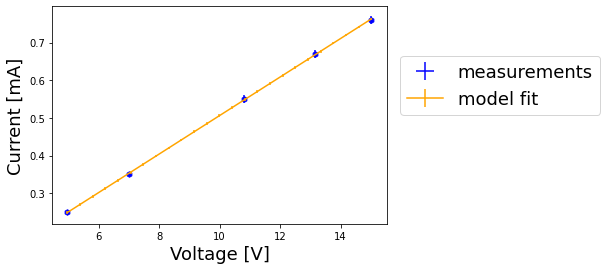

In [112]:
# create theoretical curve based on results of linear fit
voltage_theory = np.linspace(voltage_values.min(),voltage_values.max(),25)
current_theory = m*voltage_theory + offset
current_theory_uncertainities = np.sqrt(dm**2 + doffset**2)

# plot data first, then linear fit
plt.errorbar(x=voltage_values,y=current_values,xerr=voltage_uncertainities,yerr=current_uncertainities,ls='none',label='measurements',color='b')
plt.scatter(voltage_values, current_values, s = 30, marker = "h", color = "b")
plt.errorbar(x=voltage_theory,y=current_theory,xerr=None,yerr=current_theory_uncertainities,label='model fit',color='orange')
plt.xlabel('Voltage [V]', fontsize=18)
plt.ylabel('Current [mA]', fontsize=18)
plt.legend(loc=(1.04,.5),fontsize=18)
plt.show()